# Credit Risk Analysis - 1

## Load and Clean the Data

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [152]:
df_credit_risk = pd.read_csv("credit_risk_dataset.csv")

In [153]:
df_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [154]:
df_credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [155]:
df_credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [156]:
df_credit_risk.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [157]:
loan_int_rate_mean = df_credit_risk.groupby('loan_grade')['loan_int_rate'].mean()

loan_int_rate_mean

loan_grade
A     7.327651
B    10.995555
C    13.463542
D    15.361448
E    17.009455
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [158]:
df_credit_risk['loan_int_rate'] = np.where(np.isnan(df_credit_risk['loan_int_rate']), loan_int_rate_mean.loc[df_credit_risk['loan_grade']],df_credit_risk['loan_int_rate'])


In [159]:
person_emp_length_mean = df_credit_risk.groupby('person_home_ownership')['person_emp_length'].mean()

person_emp_length_mean

person_home_ownership
MORTGAGE    5.883907
OTHER       3.682243
OWN         5.167635
RENT        3.849216
Name: person_emp_length, dtype: float64

In [160]:
df_credit_risk['person_emp_length'] = np.where(np.isnan(df_credit_risk['person_emp_length']), person_emp_length_mean.loc[df_credit_risk['person_home_ownership']],df_credit_risk['person_emp_length'])

In [161]:
df_credit_risk.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [162]:
cols_of_interest = ['person_age','person_income','person_emp_length',"loan_amnt"]

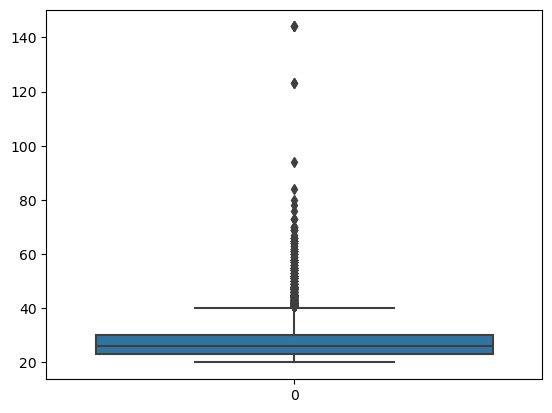

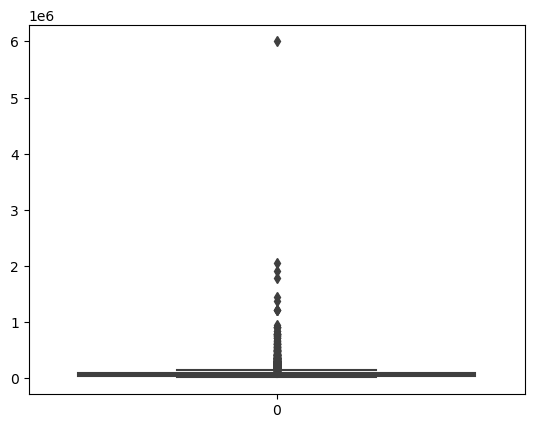

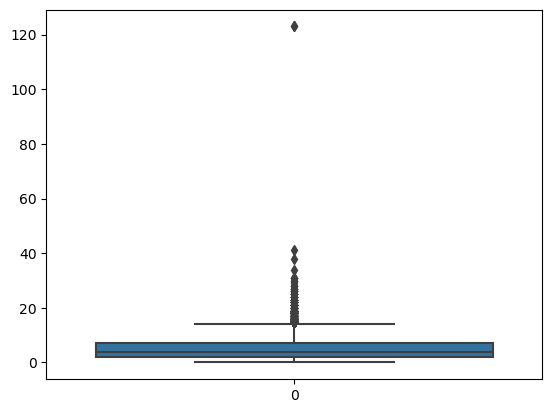

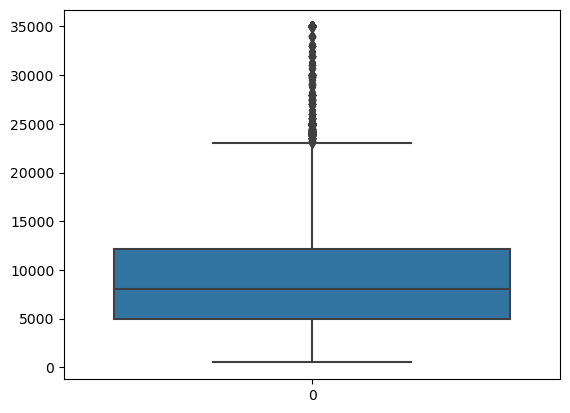

In [163]:
for feature in cols_of_interest:
    sns.boxplot(df_credit_risk[feature])
    plt.show()

In [164]:
df_credit_risk[df_credit_risk['person_income'] > 1000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.510000,0,0.01,N,8
29119,36,1200000,OWN,16.0,MEDICAL,A,10000,6.540000,0,0.01,N,11
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,7.327651,0,0.01,N,16
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.290000,0,0.00,Y,15
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.740000,0,0.00,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.400000,0,0.00,N,15
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.270000,0,0.01,N,30
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,7.327651,0,0.00,N,21


In [165]:
df_credit_risk = df_credit_risk[df_credit_risk["person_income"] < 1000000]

In [166]:
df_credit_risk[df_credit_risk['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.995555,0,0.26,N,4


In [169]:
df_credit_risk = df_credit_risk[df_credit_risk["person_age"] < 100]

In [170]:
df_credit_risk[df_credit_risk['person_emp_length'] > 50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [171]:
df_credit_risk = df_credit_risk[df_credit_risk["person_emp_length"] < 50]

In [172]:
df_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [173]:
df_credit_risk = df_credit_risk.reset_index(drop=True)

## Target Variable

In [174]:
df_credit_risk['loan_status'].value_counts()

loan_status
0    25459
1     7107
Name: count, dtype: int64

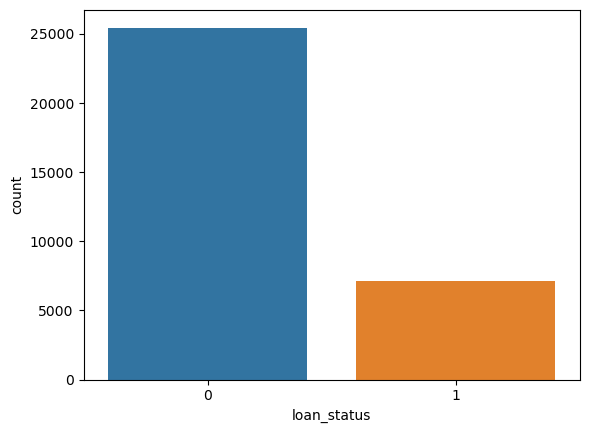

In [175]:
sns.countplot(x="loan_status", data=df_credit_risk)
plt.show()

In [176]:
df_credit_risk.to_csv('credit_risk_dataset_clean.csv', index=False)

print("DataFrame exported successfully!")

DataFrame exported successfully!
